In [608]:
import datetime as dt
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import mannwhitneyu
from matplotlib.ticker import ScalarFormatter, FormatStrFormatter, FuncFormatter

import statsmodels.formula.api as smf

import scipy.stats as stats

sns.set_theme(style="whitegrid")



# Ice Fishing Fleet Visualizations

In [609]:
landings = pd.read_csv("../data/derived/landings_all.csv", low_memory=False)


In [610]:
# ax = landings.groupby(by=['seasonal_year']).vessel_type.value_counts(normalize=True).unstack().plot.bar(stacked=True, color={'ice': '#b0dac2', 'water': '#436b88'})
# ax.set_ylabel('Share of landings (%)')
# ax.set_xlabel('Seasonal Year (August-August)')
# ax.legend = plt.legend()
# ax.legend.set_title('Type of Fishing')

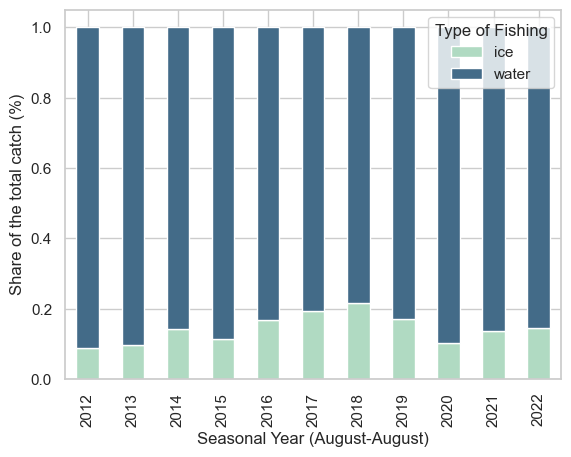

In [611]:
ax = landings.groupby(by=['seasonal_year', 'vessel_type']).amount_in_kg.sum().unstack().apply(lambda x: x / sum(x), axis='columns').plot(kind='bar', stacked=True, color={'ice': '#b0dac2', 'water': '#436b88'})
ax.set_ylabel('Share of the total catch (%)')
ax.set_xlabel('Seasonal Year (August-August)')
ax.legend = plt.legend()
ax.legend.set_title('Type of Fishing')

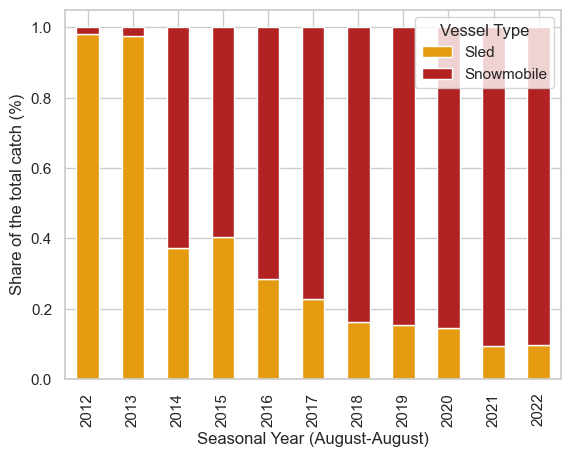

In [612]:
ax = landings.query('vessel in ["Sled", "Snowmobile"]').groupby(by=['seasonal_year', 'vessel']).amount_in_kg.sum().unstack().apply(lambda x: x / sum(x), axis='columns').plot(kind='bar', stacked=True, color={'Sled': '#e49b0f', 'Snowmobile': '#b22222'})
ax.set_ylabel('Share of the total catch (%)')
ax.set_xlabel('Seasonal Year (August-August)')
ax.legend = plt.legend()
ax.legend.set_title('Vessel Type')

In [613]:
landings['year_month'] = landings.sales_date.apply(lambda x: "-".join(x.split('-')[:2]))

In [614]:
# # Reorder the 'vessel' groups
# landings['vessel'] = pd.Categorical(landings['vessel'],
#                                    categories=['Larger Inshore Vessel', 'Dinghy', 'Sled', 'Snowmobile'],
#                                    ordered=True)

# # Create a stacked bar plot with custom colors and reordered categories
# ax = landings.groupby(by=['seasonal_year', 'vessel']).size().unstack().plot.bar(
#     stacked=True, figsize=(10, 10),
#     color={'Sled': '#e49b0f', 'Snowmobile': '#b22222', 'Dinghy': '#436b88', 'Larger Inshore Vessel': '#104e8b'})

# ax.set_ylabel("Number of landings")
# ax.set_xlabel("Month - Year")
# ax.legend(title="Vessel Type")
# plt.legend(bbox_to_anchor=(1, .05), loc='lower right')


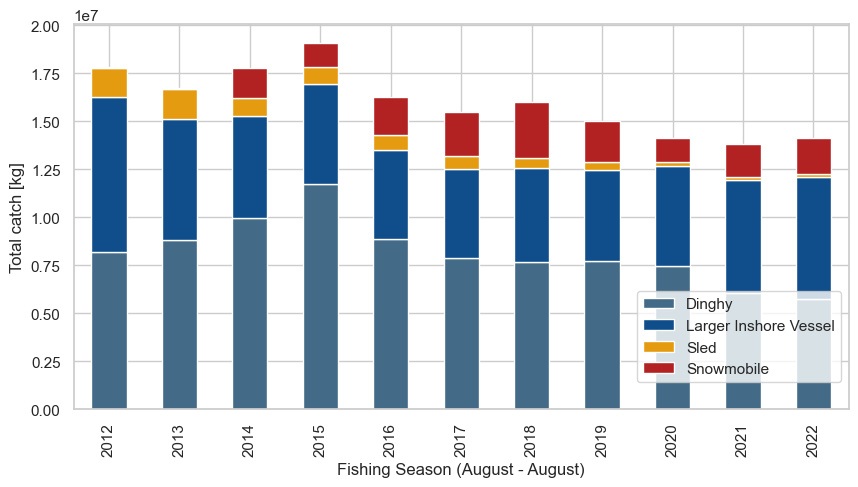

In [615]:
ax = landings.query('vessel in ["Sled", "Snowmobile", "Dinghy", "Larger Inshore Vessel"]').groupby(by=['seasonal_year', 'vessel']).amount_in_kg.sum().unstack().plot(kind='bar', stacked=True, figsize=(10, 5), color={'Sled': '#e49b0f', 'Snowmobile': '#b22222', 'Dinghy': '#436b88', 'Larger Inshore Vessel': '#104e8b'})
ax.set_ylabel('Total catch [kg]')
ax.set_xlabel('Fishing Season (August - August)')
ax.legend(title="Vessel Type")
plt.legend(bbox_to_anchor=(1, .05), loc='lower right')


In [616]:
# fishers = landings.groupby(['seasonal_year', 'vessel_type']).seller_id.nunique().unstack()
# ax = fishers.plot(kind='bar', stacked=True, color={'ice': '#b0dac2', 'water': '#436b88'})
# ax.set_ylabel('Count of Fishers')
# ax.set_xlabel('Fishing Season (August-August)')
# ax.legend(title="Fishing Type")


# fishers = pd.melt(frame=fishers, ignore_index=False, value_vars=['ice', 'water'], value_name='num_fishers')


In [617]:
# revenue = landings.groupby(['seasonal_year', 'vessel_type']).value.sum().unstack()
# ax = revenue.plot(kind='bar', stacked=True, color={'ice': '#b0dac2', 'water': '#436b88'})
# ax.set_ylabel('Gross Revenue [Million DKK]')
# ax.set_xlabel('Fishing Season (August-August)')
# ax.legend(title="Fishing Type")

# def millions_formatter(x, pos):
#      return f'{x / 1e6:.0f} '

# ax.yaxis.set_major_formatter(FuncFormatter(millions_formatter))



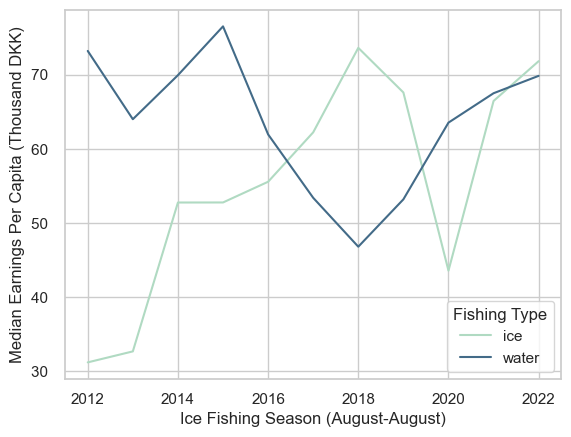

In [618]:
# Set custom colors for 'ice' and 'water'
custom_palette = {'ice': '#b0dac2', 'water': '#436b88'}

median_earnings_per_capita = pd.melt(frame=landings.groupby(['seasonal_year', 'vessel_type', 'seller_id']).value.sum().unstack(1).groupby('seasonal_year').median(), ignore_index=False, value_name='median_earnings_per_capita', value_vars=['ice', 'water'])
median_earnings_per_capita.reset_index(inplace=True)
ax = sns.lineplot(data=median_earnings_per_capita, x='seasonal_year', y='median_earnings_per_capita', hue='vessel_type', palette=custom_palette)
ax.set_xlabel("Ice Fishing Season (August-August)")
ax.set_ylabel("Median Earnings Per Capita (Thousand DKK)")
ax.legend(title="Fishing Type")

def thousands_formatter(x, pos):
     return f'{x / 1e3:.0f} '

ax.yaxis.set_major_formatter(FuncFormatter(thousands_formatter))

In [619]:
# # Set custom colors for 'ice' and 'water'
# custom_palette = {'ice': '#b0dac2', 'water': '#436b88'}

# median_earnings_per_capita = pd.melt(frame=landings.groupby(['seasonal_year', 'vessel_type', 'seller_id']).amount_in_kg.sum().unstack(1).groupby('seasonal_year').median(), ignore_index=False, value_name='median_catch_per_capita', value_vars=['ice', 'water'])
# median_earnings_per_capita.reset_index(inplace=True)
# ax = sns.lineplot(data=median_earnings_per_capita, x='seasonal_year', y='median_catch_per_capita', hue='vessel_type', palette=custom_palette)
# ax.set_xlabel("Ice Fishing Season (August-August)")
# ax.set_ylabel("Median Catch (kg) Per Capita")
# ax.legend(title="Fishing Type")


,trend,seasonal,vessel_type
year_month,,,
2012-08-01,NaN,-46.311853,ice
2012-09-01,NaN,-69.699353,ice
2012-10-01,NaN,-72.076436,ice
2012-11-01,NaN,-10.031645,ice
2012-12-01,NaN,4.521480,ice
...,...,...,...
2023-05-01,NaN,37.775647,ice
2023-06-01,NaN,7.669397,ice
2023-07-01,NaN,6.289189,ice


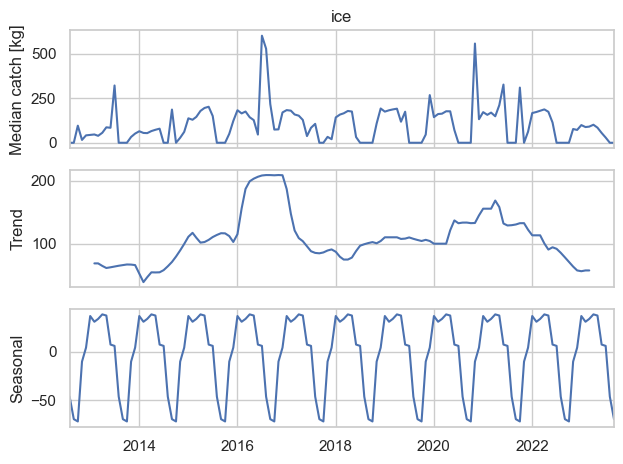

In [620]:
from statsmodels.tsa.seasonal import seasonal_decompose

median_amount = landings.groupby(by=['year_month', 'vessel_type']).amount_in_kg.median().unstack().reset_index()

median_amount.year_month = pd.to_datetime(median_amount.year_month, format='%Y-%m')
median_amount.set_index('year_month', inplace=True)

median_amount.fillna(0, inplace=True)
result = seasonal_decompose(median_amount['ice'], model="additive")
fig = result.plot(resid=False)
fig.axes[0].set_ylabel('Median catch [kg]');

median_amount_decomposed = pd.DataFrame()
median_amount_decomposed['trend'] = result.trend
median_amount_decomposed['seasonal'] = result.seasonal
median_amount_decomposed['vessel_type'] = 'ice'
median_amount_decomposed

# Ice Fishing Season Visualizations

Text(0, 0.5, 'Greenland halibut price paid to fishers (DKK / kg)')

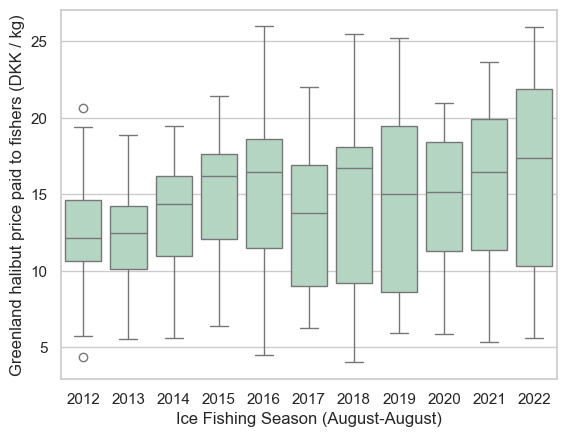

In [621]:
ppk_locality = pd.read_csv("../data/derived/ppk_locality.csv", low_memory=False)

ax = sns.boxplot(data=ppk_locality, x="seasonal_year", y="ppk", legend=False,  color= '#b0dac2')

ax.set_xlabel("Ice Fishing Season (August-August)")
ax.set_ylabel("Greenland halibut price paid to fishers (DKK / kg)")

In [622]:
(
    ppk_locality.set_index("sellers_locality")
    .groupby("seasonal_year")
    .ppk.idxmax()
    .rename("Locality with the maximum PPK")
)

seasonal_year
2012        Kapisillit
2013          Qeqertaq
2014          Oqaatsut
2015           Naajaat
2016           Saarloq
2017    Kitsissuarsuit
2018    Kitsissuarsuit
2019    Kitsissuarsuit
2020         Niaqornat
2021          Ikerasak
2022        Ukkusissat
Name: Locality with the maximum PPK, dtype: object

In [623]:
(
    ppk_locality.set_index("sellers_locality")
    .groupby("seasonal_year")
    .ppk.idxmin()
    .rename("Locality with the minimum PPK")
)

seasonal_year
2012      Sisimiut
2013      Sisimiut
2014      Tasiilaq
2015      Sisimiut
2016       Kulusuk
2017      Sisimiut
2018    Narsarsuaq
2019      Sisimiut
2020      Sisimiut
2021      Sisimiut
2022      Sisimiut
Name: Locality with the minimum PPK, dtype: object

## Total Daily Catch During Fishing Seasons 2012-2022


In [624]:
total_daily_catch

,seasonal_year,landing_date,amount_in_kg,seasonal_day,cumulative
0,2012,2012-10-15,396.50,75,396.50
1,2012,2012-11-30,146.00,121,542.50
2,2012,2012-12-01,204.90,122,747.40
3,2012,2012-12-02,49.00,123,796.40
4,2012,2012-12-05,143.80,126,940.20
...,...,...,...,...,...
1840,2022,2023-06-19,647.50,322,2063502.83
1841,2022,2023-06-24,307.49,327,2063810.32
1842,2022,2023-06-30,461.00,333,2064271.32
1843,2022,2023-07-24,96.72,357,2064368.04


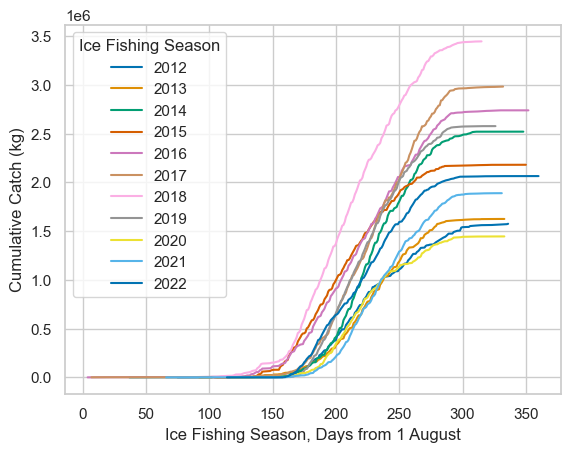

In [625]:
total_daily_catch = pd.read_csv("../data/derived/total_daily_catch.csv")
ax = sns.lineplot(
    total_daily_catch,
    x="seasonal_day",
    y="cumulative",
    hue="seasonal_year",
    palette="colorblind",
)

ax.set_xlabel("Ice Fishing Season, Days from 1 August")
ax.set_ylabel("Cumulative Catch (kg)")
ax.legend(title="Ice Fishing Season")

### Correlation Tests (Season Start, End, and Length ~ Fishing Season)


In [626]:
# total_first_catch = pd.read_csv("../data/derived/total_first_catch.csv")
# total_first_catch.corr(method="kendall").loc["first_catch_day", "season"]

In [627]:
# ax = sns.lmplot(data=total_first_catch, x="season", y="first_catch_day", legend=False)

# ax.set_axis_labels("Ice Fishing Season (August - August)", "First Day of Ice Fishing in Greenland")

In [628]:
# total_last_catch = pd.read_csv("../data/derived/total_last_catch.csv")
# total_last_catch.corr(method="kendall").loc["last_catch_day", "season"]

In [629]:
# ax = sns.lmplot(data=total_last_catch, x="season", y="last_catch_day", legend=False)

# ax.set_axis_labels("Ice Fishing Season (August - August)", "Last Day of Ice Fishing in Greenland")


In [631]:
total_ice_season_length = pd.read_csv("../data/derived/total_ice_season_length.csv")
total_ice_season_length.corr(method="kendall").loc["ice_season_length", "season"]

-0.14679516868351475

In [632]:
total_ice_season_length

,season,ice_season_length
0,2012,261
1,2013,241
2,2014,311
3,2015,246
4,2016,348
5,2017,325
6,2018,212
7,2019,210
8,2020,216
9,2021,265


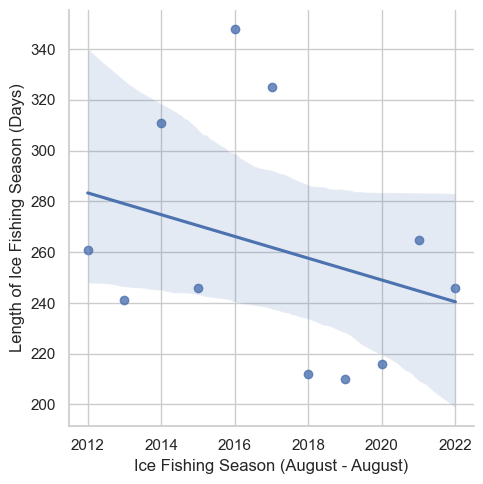

In [597]:
# ax = sns.lmplot(
#     data=total_ice_season_length, x="season", y="ice_season_length", legend=False
# )

# ax.set_axis_labels("Ice Fishing Season (August - August)", "Length of Ice Fishing Season (Days)")

### Local First Catch


Text(0, 0.5, 'First Day of Ice Fishing')

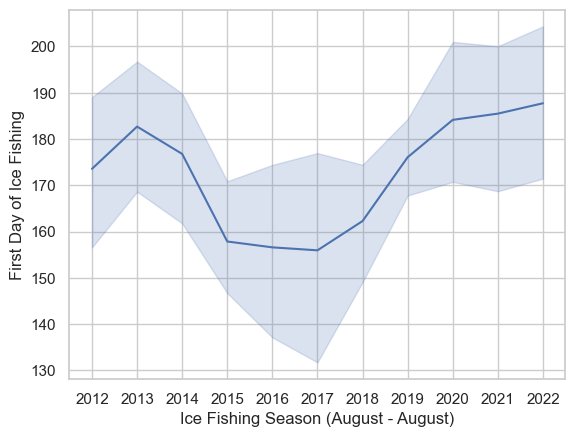

In [633]:
locality_first_catch = pd.read_csv("../data/derived/locality_first_catch.csv")

ax = sns.lineplot(
    data=locality_first_catch.groupby(by=["season", "sellers_locality"])
    .first_catch_day.min()
    .reset_index(),
    x="season",
    y="first_catch_day",
    legend=False,
)
plt.xticks(range(2012, 2023))  # Adjust the range based on your data
ax.set_xlabel("Ice Fishing Season (August - August)")
ax.set_ylabel("First Day of Ice Fishing")

### Local Last Catch


Text(0, 0.5, 'Last Day of Ice Fishing')

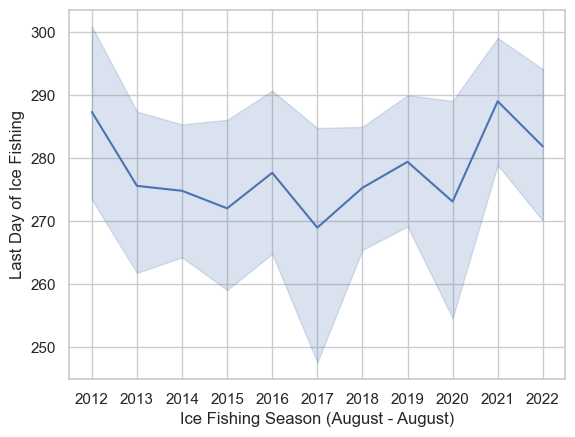

In [634]:
locality_last_catch = pd.read_csv("../data/derived/locality_last_catch.csv")

ax = sns.lineplot(
    data=locality_last_catch.groupby(by=["season", "sellers_locality"])
    .last_catch_day.max()
    .reset_index(),
    x="season",
    y="last_catch_day",
    legend=False,
)
plt.xticks(range(2012, 2023))  # Adjust the range based on your data

ax.set_xlabel("Ice Fishing Season (August - August)")
ax.set_ylabel("Last Day of Ice Fishing")


### Number of Fields Fished, 2012-2022


In [636]:
num_fields = pd.read_csv("../data/derived/total_num_fields.csv")
# ax = sns.barplot(data=num_fields, x="season", y="n_fields", color="#b0dac2")


# ax.set_xlabel("Ice Fishing Season (August - August)")
# ax.set_ylabel("Count of Ice Fishing Areas Fished")


### Local Number of Fields fished, 2012-2022

#todo create visualization of this, and stats test


In [637]:
localities = pd.read_csv("../resources/localities.csv")
localities = localities[["locality", "geo_lat"]]

Text(67.24999999999999, 0.5, 'Localities with Ice Fishing Activities, by Descending Latitude (°N)')

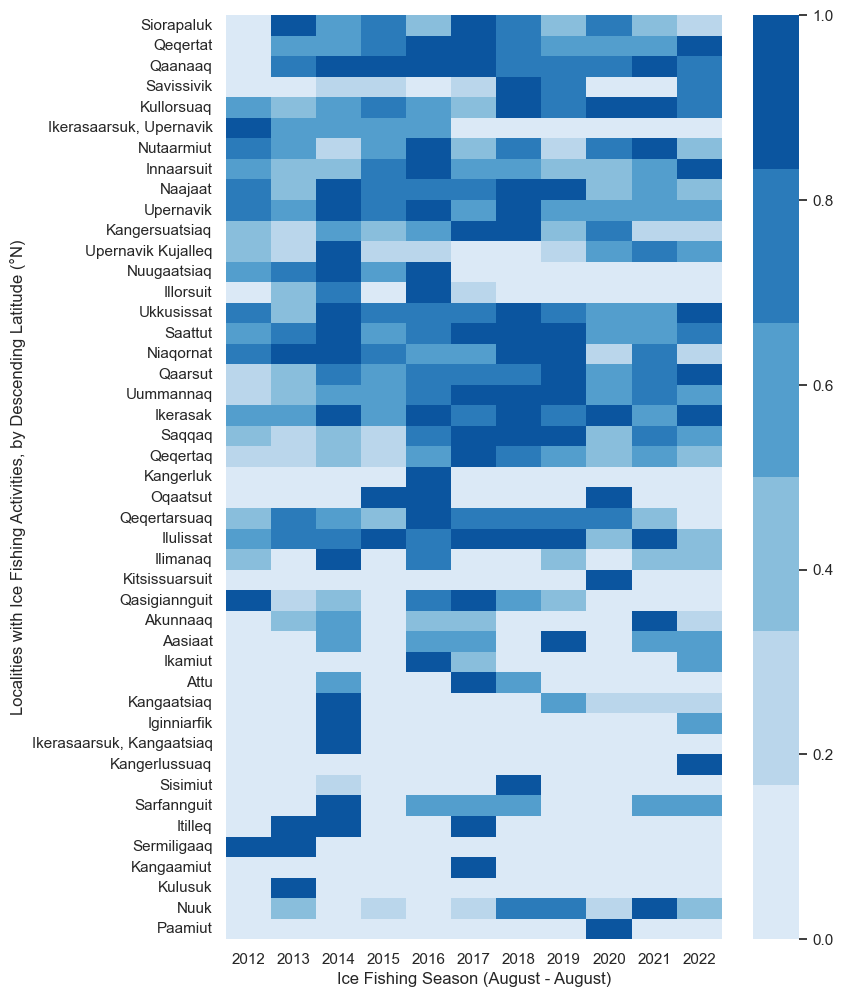

In [638]:
locality_num_fields = pd.read_csv("../data/derived/locality_num_fields.csv")
locality_num_fields = locality_num_fields.pivot(
    index="sellers_locality", columns="seasonal_year", values="n_fields"
).fillna(0)

# Normalize each locality to maximum number of field codes
locality_num_fields = locality_num_fields.div(
    locality_num_fields.max(axis="columns"), axis=0
)

locality_num_fields = (
    locality_num_fields.merge(right=localities, left_index=True, right_on="locality")
    .set_index("locality")
    .sort_values(by="geo_lat", ascending=False)
    .drop(columns="geo_lat")
)
plt.figure(figsize=(8, 12))
custom_cmap = sns.color_palette("Blues")
ax = sns.heatmap(locality_num_fields, cmap=custom_cmap)

ax.set_xlabel("Ice Fishing Season (August - August)")
ax.set_ylabel("Localities with Ice Fishing Activities, by Descending Latitude (°N)")
#plt.text(0.5, -0.09, 'Heat Map of Field Codes Fished, by locality, by year, normalized by each locality to Maximum Number of Field Codes', fontsize=10, ha='center', va='center', transform=plt.gca().transAxes)

## Ice Fishing Season Trend

In [640]:
ice_season_trend = pd.read_csv('../data/derived/ice_season_trend.csv')

# ax = sns.histplot(ice_season_trend, x='ice_season_trend', color= "#b0dac2")

# ax.set_xlabel("Ice Fishing Season Trend (days)")
# ax.set_ylabel("Count")

In [641]:
ice_season_trend

,sellers_locality,ice_season_trend,lat,lon
0,Siorapaluk,-7.169697,77.794783,-70.523647
1,Qeqertat,5.194287,77.494454,-66.671020
2,Qaanaaq,2.753725,77.467142,-69.222302
3,Savissivik,7.783133,76.018281,-65.020361
4,Kullorsuaq,0.624138,74.577534,-57.228747
5,"Ikerasaarsuk, Upernavik",4.000000,73.527222,-56.421893
6,Nutaarmiut,-3.067307,73.516098,-56.430548
7,Innaarsuit,-7.045455,73.198009,-56.014937
8,Naajaat,-0.691156,73.142135,-55.815672
9,Upernavik,-2.091855,72.783478,-56.137418


Text(0, 0.5, 'Latitude (°N)')

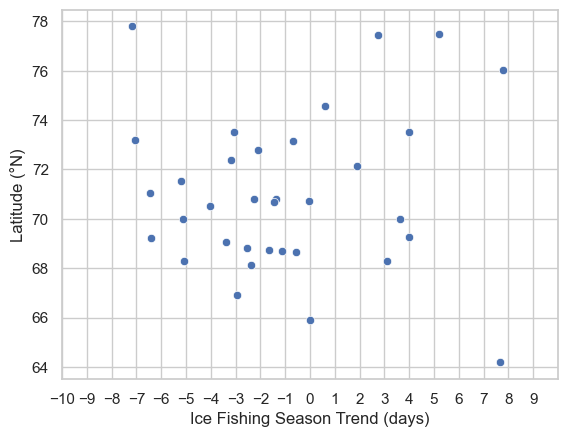

In [644]:
ax = sns.scatterplot(ice_season_trend, x="ice_season_trend", y="lat")

ax.set_xlim([-10, 10])
plt.xticks(range(-10, 10)) 

ax.set_xlabel("Ice Fishing Season Trend (days)")
ax.set_ylabel("Latitude (°N)")


Text(0, 0.5, 'Catch (kg)')

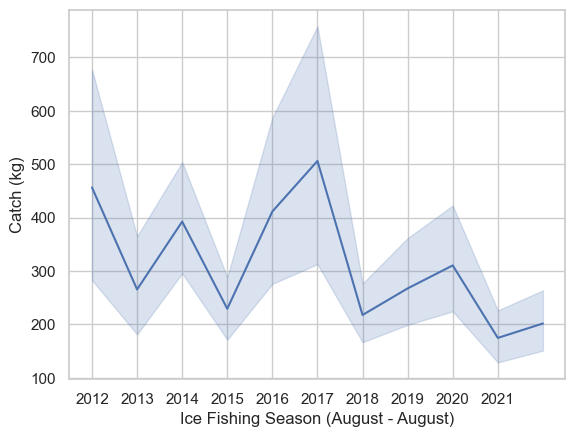

In [643]:
ax = sns.lineplot(locality_seasons[locality_seasons.first_or_last == "last"], x = "season", y = "amount_in_kg")
plt.xticks(range(2012, 2022))  # Adjust the range based on your data
ax.set_xlabel("Ice Fishing Season (August - August)")
ax.set_ylabel("Catch (kg)")